<a href="https://colab.research.google.com/github/Jigen-Ohtsusuki/CNN_Classification/blob/main/animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import requirements

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# load dataset

In [6]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

# clipping the image and converting to greyscale

In [7]:
x_train = x_train.reshape(len(x_train), 100, 100,3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100,3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

# selects and index and shows the 100 x 100 image from dataset

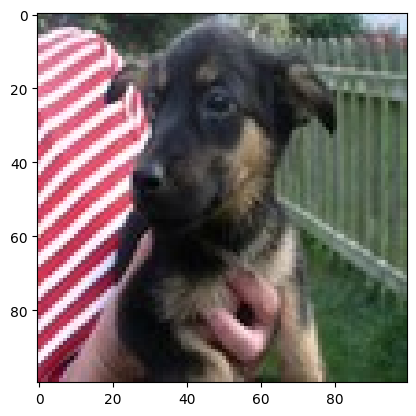

[0.]


In [8]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx])
plt.show()
print(y_train[idx])

# relu function

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# training

In [17]:
model.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9701 - loss: 0.1226
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9813 - loss: 0.0871
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9902 - loss: 0.0655
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9943 - loss: 0.0506
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9981 - loss: 0.0408
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9988 - loss: 0.0353
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9996 - loss: 0.0264
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9995 - loss: 0.0218
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 1.0000 - loss: 0.0174
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.0000 - loss: 0.0141
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 1.0000 - loss: 0.0118
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - lo

# Evaluating the final model

In [18]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.6606 - loss: 1.8262


[1.6931861639022827, 0.6675000190734863]

# results

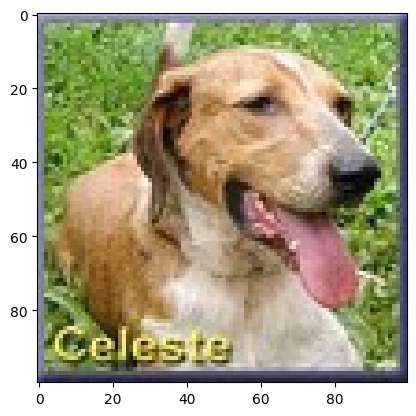

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
it is a :  dog


In [19]:
model.save('cnn_mode.h5')
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
  pred = 'dog'
else:
  pred = 'cat'
print("it is a : ", pred)